# Netflix Content Data Analysis

**Overview**: 

Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages.
se.

**Dataset**:
- Consist of 8807 entries
- 12 variables/characteristics for each Movie/TV show

They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Objectives**:

- Conducting data analysis on the trends of the Netflix contents
- Investigate or recommendations for an upcoming video streaming platf
orm.

### Installation and Importing required Packages

In [308]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker #Set a tick on each integer multiple of a base within the view interval

### Load the dataset

In [319]:
contents_df=pd.read_csv('netflix_titles/netflix_titles.csv')

In [320]:
contents_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploratory Data Analysis 

#### Check the number of columns and rows

In [321]:
contents_df.shape #(rows,cols)

(8807, 12)

In [322]:
contents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [323]:
#Checking statistics of columns
contents_df.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [324]:
# Check all the columns in Dataframe
contents_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [325]:
# Check if all the show_id values are unique
contents_df.show_id.nunique()

8807

In [326]:
# code to get the unique values of each column in the dataset
for colname in list(contents_df.columns):
    print(f"""{colname}:\t\t\t{contents_df[str(colname)].nunique()}""")

show_id:			8807
type:			2
title:			8807
director:			4528
cast:			7692
country:			748
date_added:			1767
release_year:			74
rating:			17
duration:			220
listed_in:			514
description:			8775


#### Copy of the dataframe

In [327]:
df = contents_df.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Reset theindex to show_id

In [328]:
# Reset the index
df.set_index('show_id', inplace=True)

In [329]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Check for duplicate values

In [330]:
#Check for the number of duplicated values
df.duplicated().sum()

0

#### Check for missing values

In [331]:
# Total number of null values in the dataframe 
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [332]:
df.isnull().sum().sum()

4307

There are 4307 null values in the dataframe

There are 2634 null values in **director** column , 825 null values in **cast** column and 831 null values in **country** column, so replacing the values with *'Unknown'*

In [334]:
#replacing Null Values in director by"Unkown" val
df['director'] = df['director'].replace(np.nan,"Unknown")
df.director.isnull().sum()

0

In [340]:
#replacing Null Values in cast by"Unkown" val
df['cast'] = df['cast'].replace(np.nan,"Unknown")
df.cast.isnull().sum()

0

In [341]:
#replacing Null Values in country by"Unkown" val
df['country'] = df['country'].replace(np.nan,"Unknown")
df.country.isnull().sum()

0

**Checking the ratings column**

In [343]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

There are three invalid values in **rating** column 74min,84 min,66 min and four null values. Replacing the values with *'NR'*

In [344]:
#replacing Null Values in rating by"Unkown" val
df['rating'] = df['rating'].replace([np.nan,'74 min', '84 min', '66 min'], 'NR')
df.rating.isnull().sum()

0

**Duration Column**

In [345]:
#replacing Null Values in rating by"Unkown" val
df['duration'] = df['duration'].replace(np.nan,"Unknown")
df.duration.isnull().sum()

0

**Date Added Column**

In [100]:
# there're 10 movies which their date_added is null
df[df['date_added'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


In [338]:
# #drop rows that "date_added" Null Value
df.dropna(subset=['date_added'],inplace =True) 
df.date_added.isnull().sum()

0

In [346]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Check the Data types

In [347]:
df.shape

(8797, 11)

In [348]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**Release Year**

In [349]:
df.release_year.unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

**Date Added**

In [350]:
#convert date_added column from "object" to "Date"
df['date_added']= df['date_added'].apply(pd.to_datetime)
df['date_added'].dtype 

dtype('<M8[ns]')

In [351]:
#splilting Year from date_added col
df['year_added'] = df['date_added'].dt.year
df['year_added'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2008, 2010])

In [355]:
#splilting Month from date_added col
# df['month_added'] = df['date_added'].dt.month 
df['month_added'] = df['date_added'].dt.month_name(locale = 'English') # month name from datetime format
df['month_added']

show_id
s1       September
s2       September
s3       September
s4       September
s5       September
           ...    
s8803     November
s8804         July
s8805     November
s8806      January
s8807        March
Name: month_added, Length: 8797, dtype: object

In [356]:
df.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
show_id,,,,,,,,,,,,,
s6602,TV Show,Devlok with Devdutt Pattanaik,Unknown,"Rasika Dugal, Devdutt Pattanaik",India,2018-10-15,2017,TV-PG,1 Season,International TV Shows,"Through chats with host Rasika Dugal, mytholog...",2018,October
s2228,TV Show,Cursed,Unknown,"Katherine Langford, Devon Terrell, Gustaf Skar...","United Kingdom, Australia",2020-07-17,2020,TV-MA,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",Armed with mysterious powers and a legendary s...,2020,July
s8155,Movie,Tayo the Little Bus Movie: Mission Ace,Ryu Jung-woo,"Moon Nam-sook, Jeong Hye-ok, Choe Hana, Gim Ye...",United States,2019-07-01,2016,TV-Y7,48 min,Children & Family Movies,"After he loses his favorite racing car, Duri v...",2019,July
s3793,TV Show,When They See Us,Unknown,"Asante Blackk, Caleel Harris, Ethan Herisse, J...",United States,2019-05-31,2019,TV-MA,1 Season,"Crime TV Shows, TV Dramas",Five teens from Harlem become trapped in a nig...,2019,May
s6836,TV Show,Genius of the Modern World,Unknown,Bettany Hughes,United Kingdom,2017-08-01,2016,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Historian Bettany Hughes explores the intellec...,2017,August


**Type Column**

In [357]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

### Visualizations

#### Number of movies and shows in Netflix

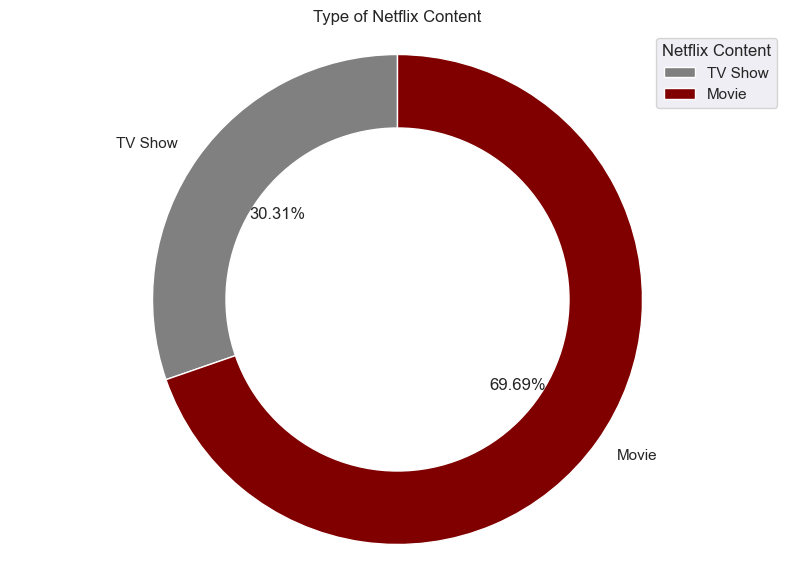

In [359]:
plt.figure(figsize=(10, 7))
labels=['TV Show', 'Movie']

plt.pie(df['type'].value_counts().sort_values(),labels=labels,autopct='%1.2f%%',colors=['grey','maroon'], startangle=90);

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Type of Netflix Content')
 
# Add Legends
plt.legend(labels, loc="upper right", title="Netflix Content")

plt.axis('equal')
plt.show()


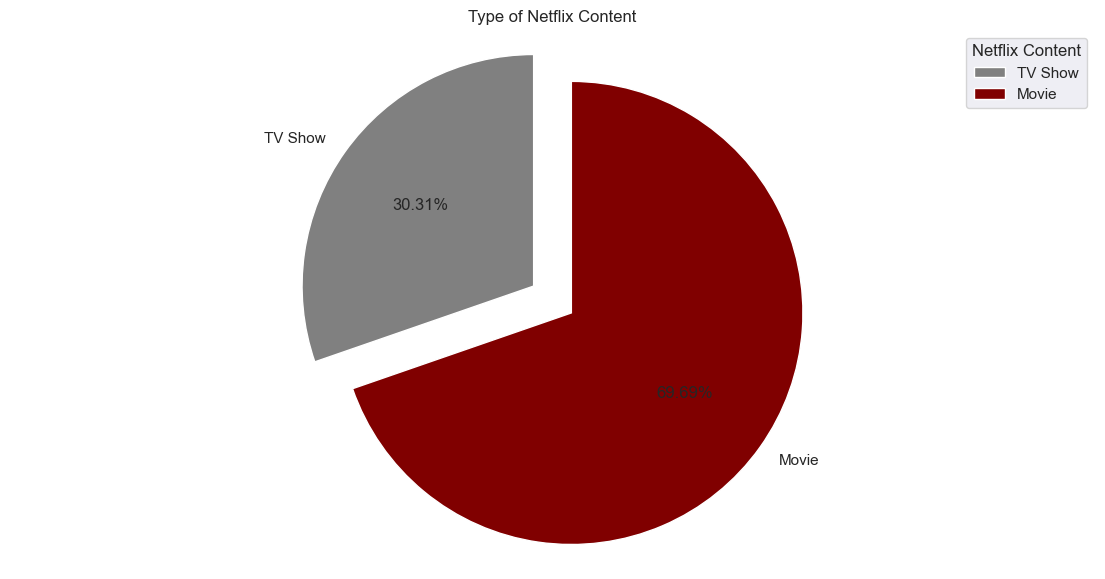

In [360]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],autopct='%1.2f%%',colors=['grey','maroon'], startangle=90)

plt.title('Type of Netflix Content')
# Add Legends
plt.legend(labels, loc="upper right", title="Netflix Content")
plt.axis('equal')
plt.show()

The summary of the data set shows that Netflix is currently focusing more on Movies than on TV Shows.

#### Movies and Shows Added over years

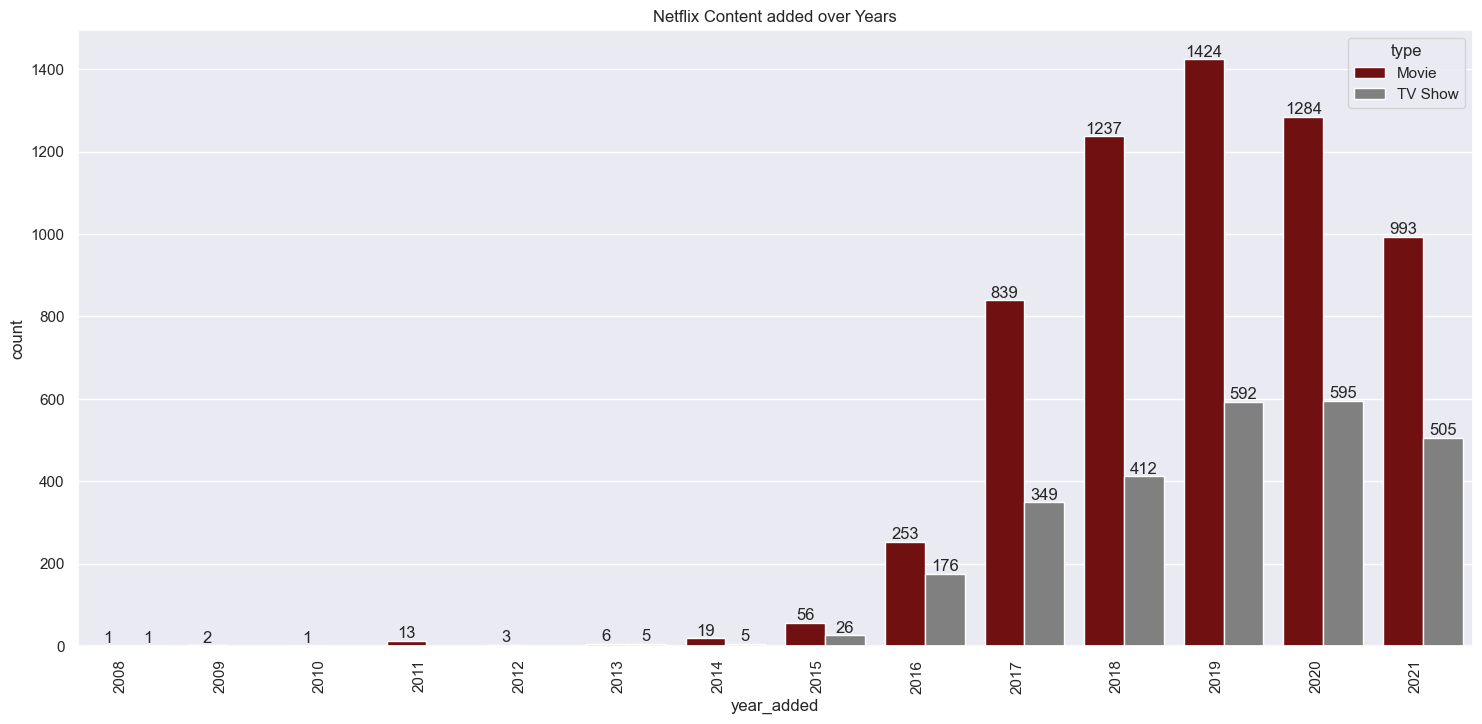

In [465]:
plt.figure(figsize = (18,8))
ax=sns.countplot(x='year_added', hue='type', data=df, palette=['maroon',"grey"]);
plt.xticks(rotation=90, ha='right')
plt.title('Netflix Content added over Years')
for i in ax.containers:
    ax.bar_label(i,)

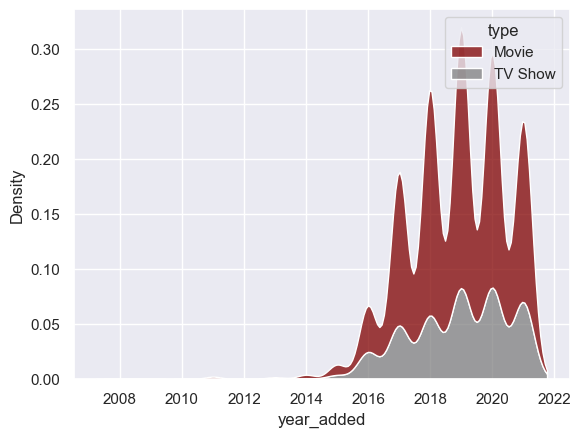

In [368]:
sns.kdeplot(data=df, x="year_added", hue="type", multiple="stack",palette=['maroon','grey']);

It appears that Netflix has been focusing more on increasing Movie content, compared with TV Shows, since it is shown that the number of Movies added increased much more dramatically than the number of TV shows.

-We can see that from 2012 to 2018, Netflix added most recent contents, they made sure most recent contents per release year are higher than the older release year contents. Then in 2019, it started dropping, this may be due to the Covid-19, but further analysis may be needed to determine this.

#### Movies and Shows Added over month

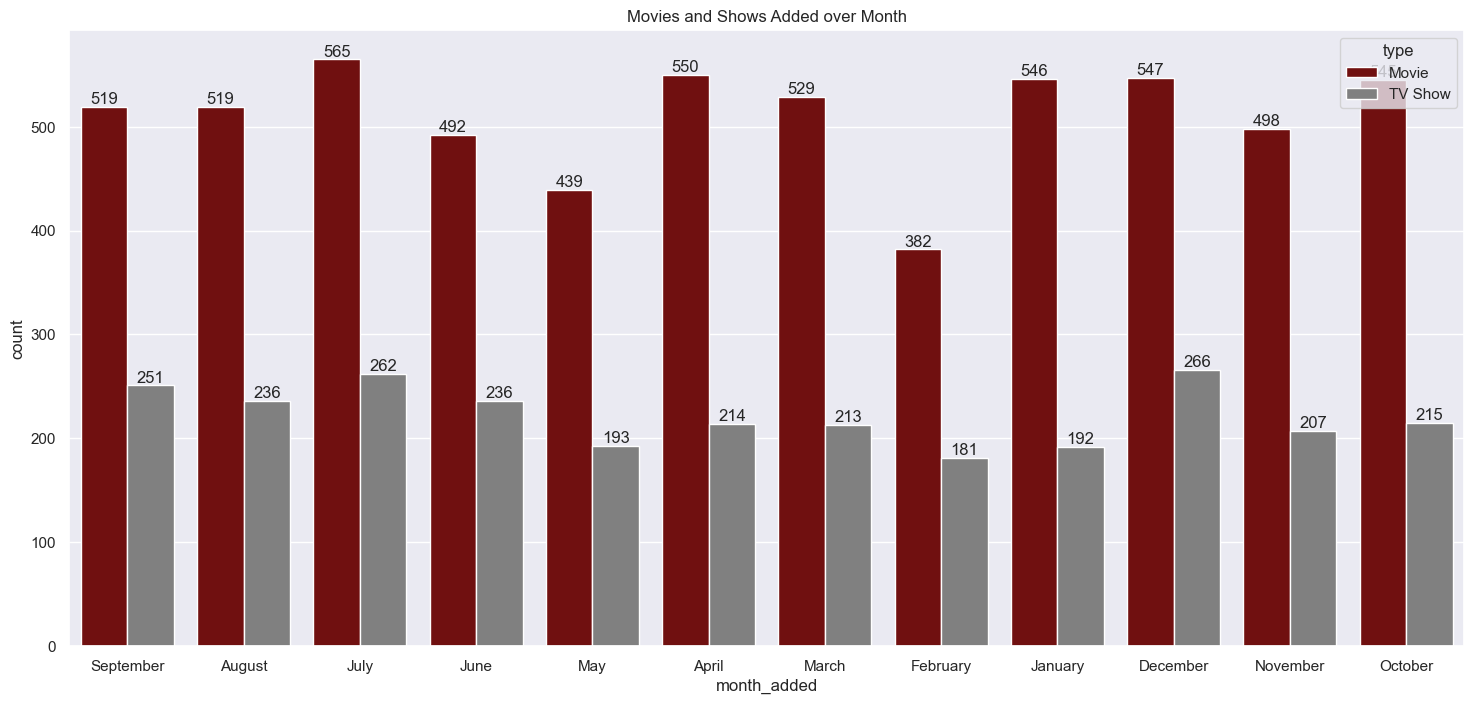

In [367]:
plt.figure(figsize = (18,8))
ax=sns.countplot(x='month_added', hue='type', data=df,palette=['maroon',"grey"] );
plt.title('Movies and Shows Added over Month')
for i in ax.containers:
    ax.bar_label(i,)


Netflix recognizes the viewing habits of its customers, acknowledging that they typically have more leisure time during certain seasons. This presents a prime opportunity to attract viewers. Additionally, it's worth mentioning that Netflix tends to release a higher number of new movies in the latter half of the year, spanning from June to December.Holiday seasons — December, January, and July seem to be the best time for the release of new content on Netflix.

#### Contents Across Countries

In [371]:
#Splitting the multi values in the country column
country_dict = {}
ctry = list(df['country'])
for i in ctry:
    i = i.replace(' ', '')
    i = list(i.split(','))
    
    for j in i:
        if j in list(country_dict.keys()):
            country_dict[j] +=1
        else:
            country_dict[j] = 1
  
country_df = pd.DataFrame(country_dict.items(), columns=['country','count']).sort_values(by='count',ascending=False).head(20) # Filtering the 20 countries
country_df

,country,count
0,UnitedStates,3684
3,India,1046
2,Unknown,830
6,UnitedKingdom,805
16,Canada,445
13,France,393
17,Japan,317
19,Spain,232
21,SouthKorea,231
7,Germany,226


In [397]:
# Removing the Unknown value from the column
mask = country_df['country'].isin(['Unknown'])
country_df = country_df[~mask]

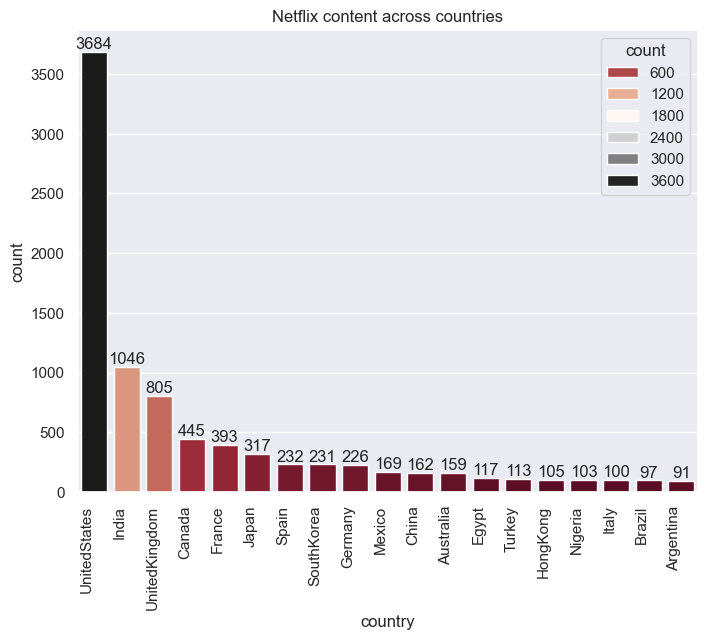

In [391]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x=country_df['country'] , y = country_df['count'],hue = country_df['count'], palette='RdGy');
plt.xticks(rotation=90, ha='right')
plt.title('Netflix content across countries')
for i in ax.containers:
    ax.bar_label(i,)

The leading contributors to Netflix's content production are the United States, India, and the UK. Given that Netflix is a U.S.-based company, it is logical that the U.S. holds the primary position in content contribution. While India and the UK rank second and third in numerical terms, their production levels are notably lower compared to the U.S.

#### Content_type across countries

In [392]:
def count_countries(countries_df):
    '''
    function to counts the number of countries that appear in each entry and returns the dictionary which contains this information
    '''
    countries_dict = dict()
    for country_entry in countries_df:
        countries_list = country_entry.split(', ')
        for country in countries_list:
            if country in countries_dict.keys():
                countries_dict[country] += 1
            else:
                countries_dict[country] = 1
    return countries_dict

In [407]:
df_tv=df[df["type"]=="TV Show"]['country'] # filtering TV Show 
df_movies=df[df["type"]=="Movie"]['country'] # filtering Movies

In [408]:
movies_dict = count_countries(df_movies)
tv_dict = count_countries(df_tv)

In [413]:
# movies dataframe
movies = pd.DataFrame(movies_dict.items(), columns=["Country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
unknown_mask = movies['Country'].isin(['Unknown'])
movies = movies[~unknown_mask] # Excluding  the unknown value
# shows dataframe
shows = pd.DataFrame(tv_dict.items(), columns=["Country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
unknown_mask = shows['Country'].isin(['Unknown'])
shows = shows[~unknown_mask] # Excluding  the unknown value

In [414]:
movies.head()

,Country,Frequency
0,United States,2751
1,India,962
2,United Kingdom,532
4,Canada,319
5,France,303


In [415]:
shows.head()

,Country,Frequency
0,United States,932
2,United Kingdom,271
3,Japan,198
4,South Korea,170
5,Canada,126


In [416]:
# the order in both the dataframe is not same, hence merge the dataframes

all_contents = movies.merge(shows, how="outer", on="Country").head(10) #merge movies and shows dataframe
all_contents.rename(columns={"Frequency_x": "Number of Movies", "Frequency_y": "Number of TV Shows"}, inplace=True) # Rename the column name
all_contents = all_contents.astype({"Number of Movies":'int64', "Number of TV Shows":'int64'}) # Change the datatype
all_contents.head()

,Country,Number of Movies,Number of TV Shows
0,United States,2751,932
1,India,962,84
2,United Kingdom,532,271
3,Canada,319,126
4,France,303,90


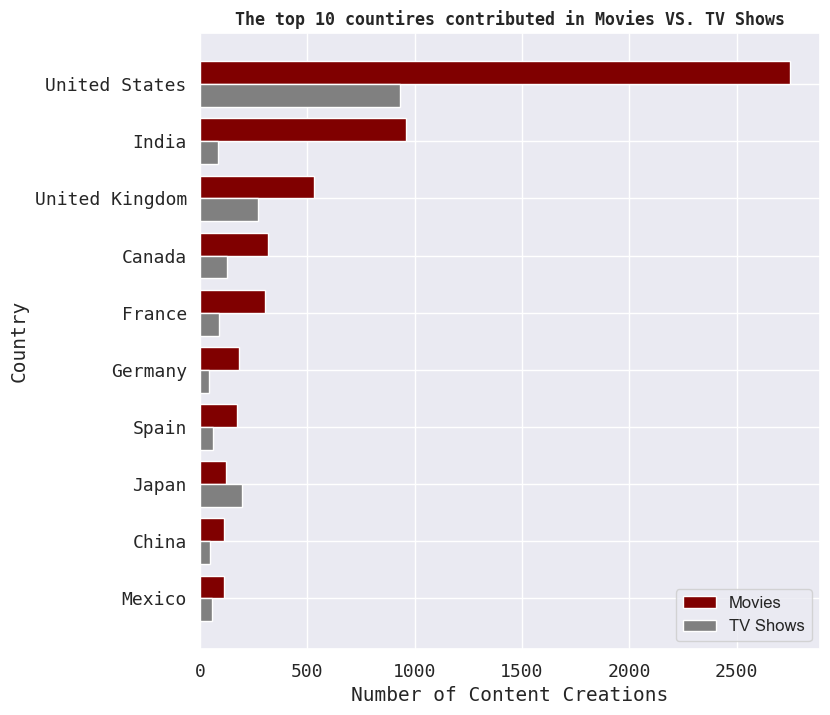

In [467]:
num_of_movies = all_contents["Number of Movies"]
num_of_shows = all_contents["Number of TV Shows"]

ind = np.arange(len(num_of_movies))
width = 0.4

figure = plt.figure(figsize=(8,8))

plt.barh(ind, num_of_movies, width, color="maroon", label="Movies")
plt.barh(ind + width, num_of_shows, width, color="grey", label="TV Shows")

plt.title("The top 10 countires contributed in Movies VS. TV Shows", fontname="monospace", fontweight="bold")
plt.ylabel("Country", fontsize=14, fontname="monospace")
plt.xlabel("Number of Content Creations", fontsize=14, fontname="monospace")
plt.yticks(ind + 0.2, labels=all_contents["Country"], fontsize=13, fontname="monospace")
plt.xticks(fontsize=13, fontname="monospace")
plt.gca().invert_yaxis()
plt.legend(fontsize="medium")
plt.show()


As anticipated, globally, the number of movies added to the platform exceeds that of TV shows. India, ranking as the second-highest contributor, shows a significant disparity between its movie and TV show offerings. This is attributed to the renowned Bollywood industry, which produces a greater volume of movies every years.

#### Most Popular Categories

In [418]:
movies_categories_df = df[df.loc[df['listed_in'].notnull()]["type"]=="Movie"]['listed_in']

movies_categories_dict = dict()
for category_entry in movies_categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in movies_categories_dict.keys():
            movies_categories_dict[category] += 1
        else:
            movies_categories_dict[category] = 1
            
# to see the results in a dataframe
movie_categories = pd.DataFrame(movies_categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
movie_categories.head(10)

,Category,Frequency
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


In [419]:
shows_categories_df = df[df.loc[df['listed_in'].notnull()]["type"]=="TV Show"]['listed_in']

shows_categories_dict = dict()
for category_entry in shows_categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in shows_categories_dict.keys():
            shows_categories_dict[category] += 1
        else:
            shows_categories_dict[category] = 1
            
# to see the results in a dataframe
show_categories = pd.DataFrame(shows_categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
show_categories.head(10)

,Category,Frequency
0,International TV Shows,1350
1,TV Dramas,762
2,TV Comedies,574
3,Crime TV Shows,469
4,Kids' TV,449
5,Docuseries,394
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,252
9,Anime Series,175


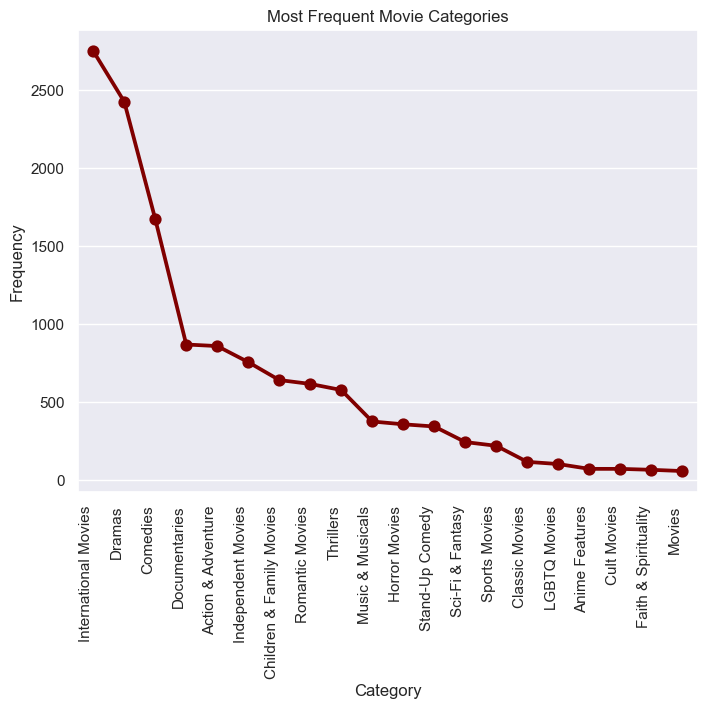

In [420]:
plt.figure(figsize = (8,6))
sns.pointplot(data=movie_categories, x="Category", y="Frequency",color='maroon');
plt.title('Most Frequent Movie Categories')
plt.xticks(rotation=90, ha='right')
plt.show()

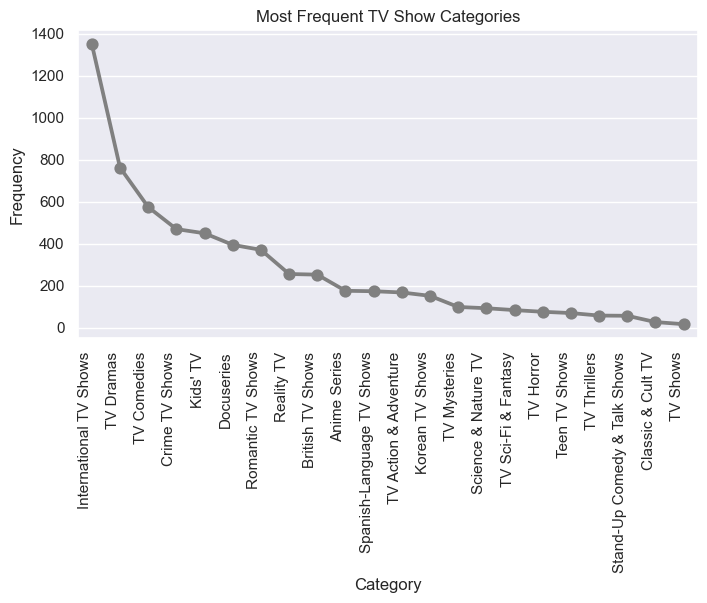

In [421]:
plt.figure(figsize = (8,4))
sns.pointplot(data=show_categories, x="Category", y="Frequency",color='grey');
plt.title('Most Frequent TV Show Categories')
plt.xticks(rotation=90, ha='right')
plt.show()

International Movies and International TV shows top the list of categories. The popular genres in 
- movie categories are Drama, Comedy,Documentary, Action and Adventure
- TV show categories are Drama, Comedy, Crime, Kids, Docuseries

#### Number of movies and TV shows by Rating


Netflix assigns a maturity rating to every TV show and movie to assist members in making informed choices for themselves and their children. The determination of maturity ratings by Netflix is based on the frequency and impact of mature content within a TV show or movie. In the case of TV shows, the rating reflects the overall maturity level of the entire series.
- Little Kids: G,TV-Y,TV-G
- Older Kids: PG, TV-Y7,TV-Y7-FV,TV-PG
- Teens : PG-13, TV-14
- Adults: R, NC-17, TV-MA

In [425]:
df["rating"].value_counts().sort_values(ascending=True)

rating
NC-17          3
UR             3
TV-Y7-FV       6
G             41
NR            86
TV-G         220
PG           287
TV-Y         306
TV-Y7        333
PG-13        490
R            799
TV-PG        861
TV-14       2157
TV-MA       3205
Name: count, dtype: int64

Some ratings are only applicable to Movies, such as PG-13, PG, NC-17, and UR. The most common ratings for both Movies & TV Shows are TV-MA (for Adults group) and TV-14 (for Teens group).

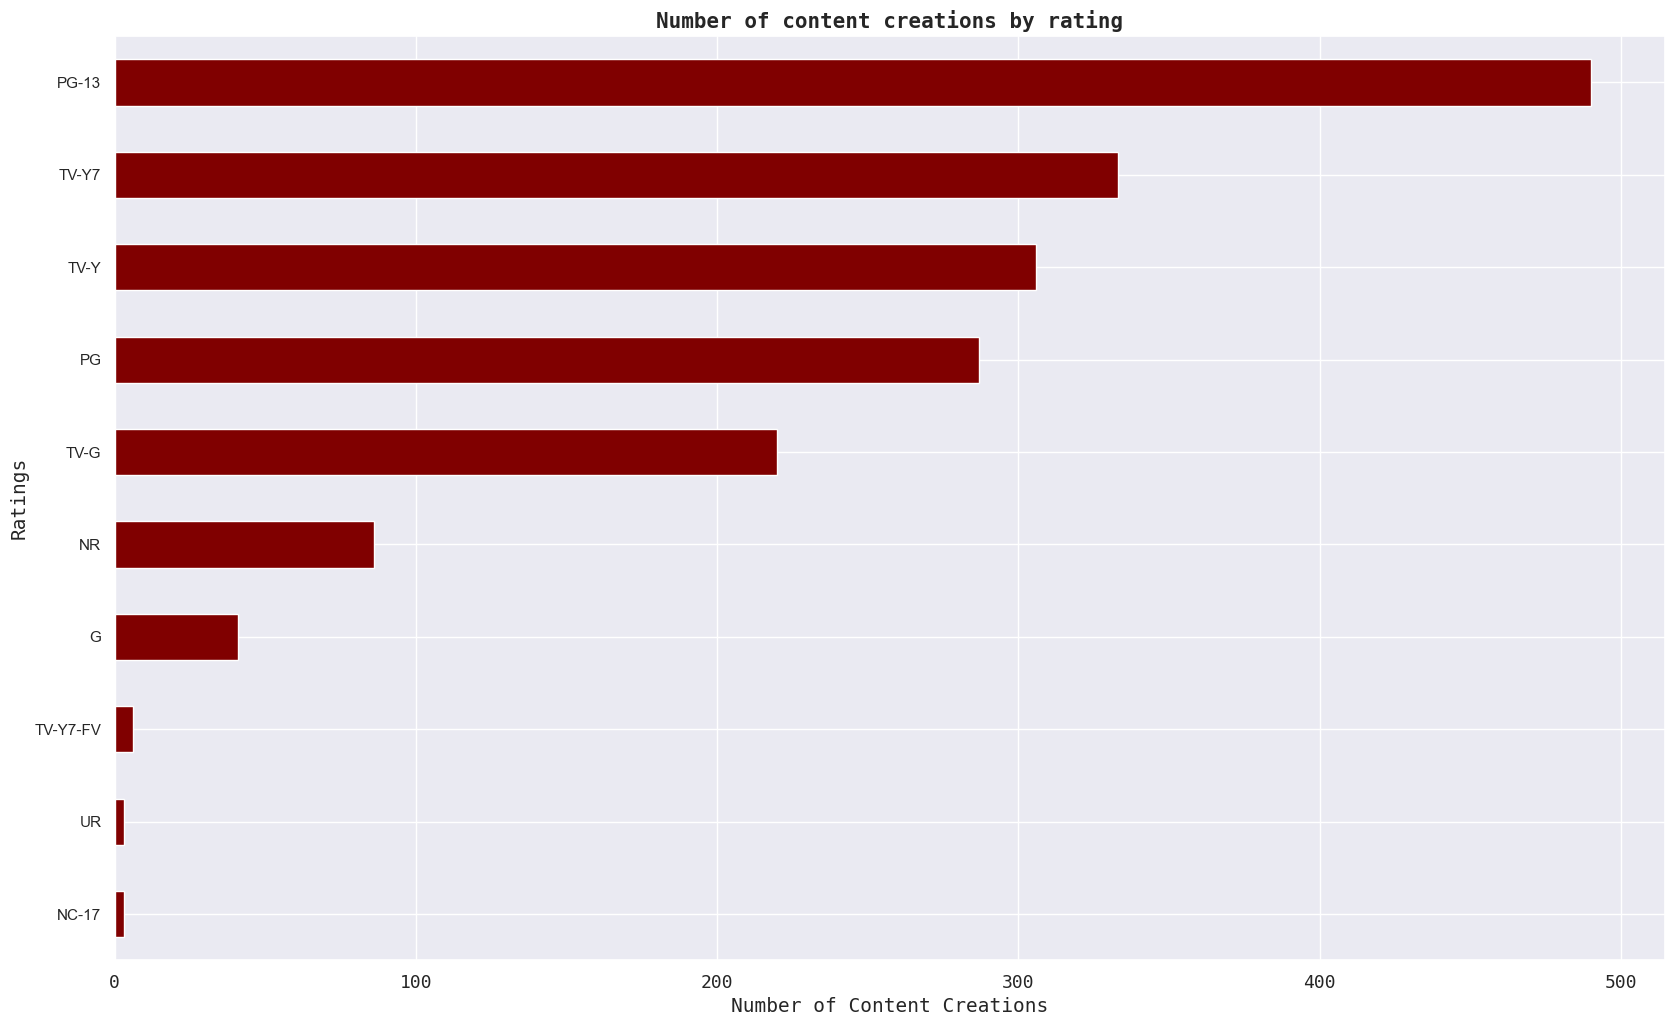

In [477]:
figure = plt.figure(figsize=(20, 12))
df["rating"].value_counts().sort_values()[:10].plot(kind="barh", color="maroon")
plt.title("Number of content creations by rating", fontname="monospace", fontsize=15, fontweight="bold")
plt.xlabel("Number of Content Creations", fontsize=14, fontname="monospace")
plt.ylabel("Ratings", fontsize=14, fontname="monospace")
plt.xticks(fontsize=13, fontname="monospace")
plt.show()

In [428]:
df_tv=df[df["type"]=="TV Show"]# filtering TV Show
df_movies=df[df["type"]=="Movie"] # filtering Movies
# df_movies = df_movies[~mask]

In [429]:
movies_rating = dict(df_movies['rating'].value_counts())
tv_shows_rating = dict(df_tv['rating'].value_counts())

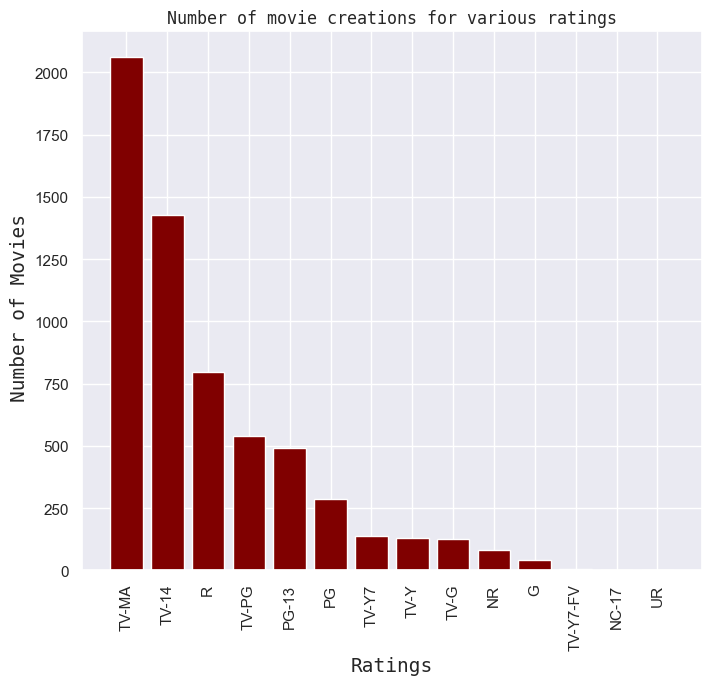

In [473]:
x_movies = list(movies_rating.keys())
y_movies = list(movies_rating.values())
# Plot the count of ratings for Tv shows and movies to understand them better.
plt.figure(figsize=(8,7))
plt.bar(x_movies,y_movies, color='maroon')
plt.ylabel("Number of Movies ", fontsize=14, fontname="monospace")
plt.xlabel("Ratings", fontsize=14, fontname="monospace")
plt.title("Number of movie creations for various ratings", fontname="monospace")
# plt.bar(list(movies_rating.keys(),list(movies_rating.values()), color='maroon');
plt.xticks(rotation=90)
plt.show()


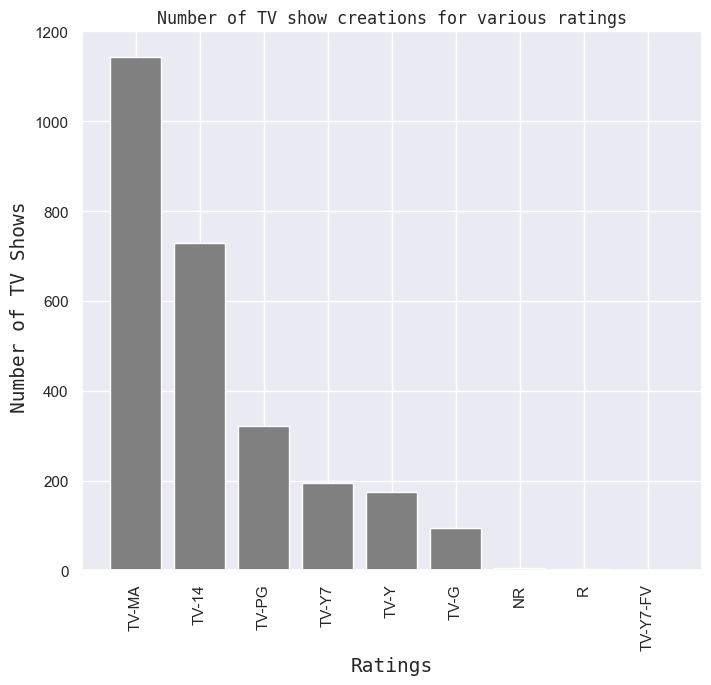

In [475]:
x_shows = list(tv_shows_rating.keys())
y_shows = list(tv_shows_rating.values())

# Plot the count of ratings for Tv shows and movies to understand them better.
plt.figure(figsize=(8,7))
plt.bar(x_shows,y_shows, color='grey')
plt.ylabel("Number of TV Shows ", fontsize=14, fontname="monospace")
plt.xlabel("Ratings", fontsize=14, fontname="monospace")
plt.title("Number of TV show creations for various ratings", fontname="monospace")
# plt.bar(list(movies_rating.keys(),list(movies_rating.values()), color='maroon');
plt.xticks(rotation=90)
plt.show()


TV-MA leads in popularity on Netflix, suggesting that content for mature audiences is more in deman.
Following closely are TV-14 and TV-PG, which cater to teenagers and older children, respective. .
Titles rated NC-17 are relatively scarce, which makes sense as this category is exclusively meant for viewers over the age of 17.

#### Top 10 Directors

In [485]:
data = df['director'].value_counts().iloc[1:11].to_dict()
df2 = pd.DataFrame(list(data.items()),columns=['Director','Count'])
df2

,Director,Count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,11


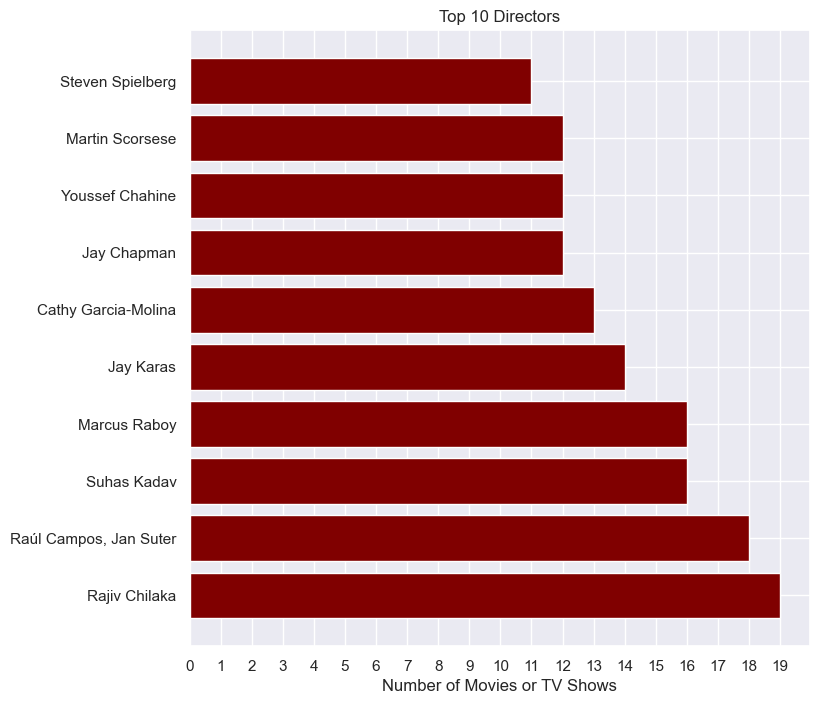

In [490]:
plt.figure(figsize=(8,8))
ax = plt.barh(df2['Director'],df2['Count'], color='maroon')
plt.title('Top 10 Directors')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Number of Movies or TV Shows")
plt.show()

#### Oldest Content in Netflix

In [451]:
five_lowest_years = df['release_year'].value_counts().nsmallest(5).index
oldest_movies = df[df['release_year'].isin(five_lowest_years)]
oldest_movies = oldest_movies.sort_values(by='release_year')
oldest_movies

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
show_id,,,,,,,,,,,,,
s4251,TV Show,Pioneers: First Women Filmmakers*,Unknown,Unknown,Unknown,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018,December
s8588,Movie,Thunderbolt,"William Wyler, John Sturges","James Stewart, Lloyd Bridges",United States,2017-03-31,1947,TV-PG,42 min,"Classic Movies, Documentaries",A P-47 Thunderbolt squadron is shown in prepar...,2017,March
s543,Movie,Ujala,Naresh Saigal,"Mala Sinha, Shammi Kapoor, Raaj Kumar, Leela C...",India,2021-07-06,1959,TV-14,143 min,"Dramas, International Movies",An honest man dreams of a better life for his ...,2021,July
s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States",2021-09-01,1961,TV-14,156 min,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",2021,September
s5392,Movie,Amrapali,Lekh Tandon,"Vyjayantimala, Sunil Dutt, Prem Nath, Bipin Gu...",India,2017-07-01,1966,TV-PG,116 min,"Dramas, International Movies, Music & Musicals",In the age of Buddha and his philosophy of non...,2017,July


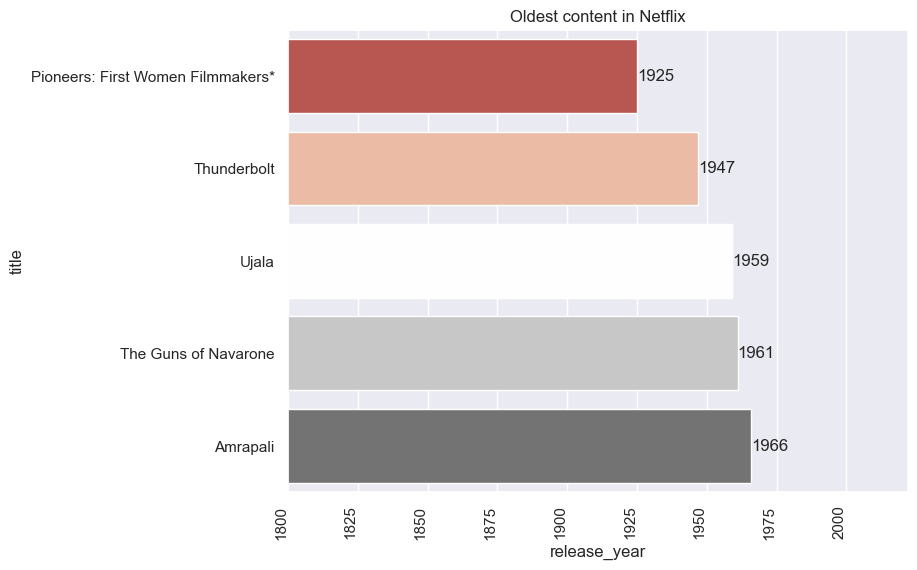

In [464]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x=oldest_movies['release_year'] , y = oldest_movies['title'],hue = oldest_movies['title'], palette='RdGy');
plt.xticks(rotation=90, ha='right')
plt.title('Oldest content in Netflix')
plt.xlim([1800,max(df['release_year']) + 1])
for i in ax.containers:
    ax.bar_label(i,)

#### Duration of Contents

In [445]:
# Create subsets for tv shows and movies.
tv_shows = df[(df['type'] == 'TV Show') & (df['duration'] != 'Unknown')]
movies = df[(df['type'] == 'Movie') & (df['duration'] != 'Unknown')]
# movies = df[df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '').str.replace(' Seasons', '').str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)


In [446]:
duration_movies['duration']

0        90
1        91
2       125
3       104
4       127
       ... 
6123     96
6124    158
6125     88
6126     88
6127    111
Name: duration, Length: 6128, dtype: int32

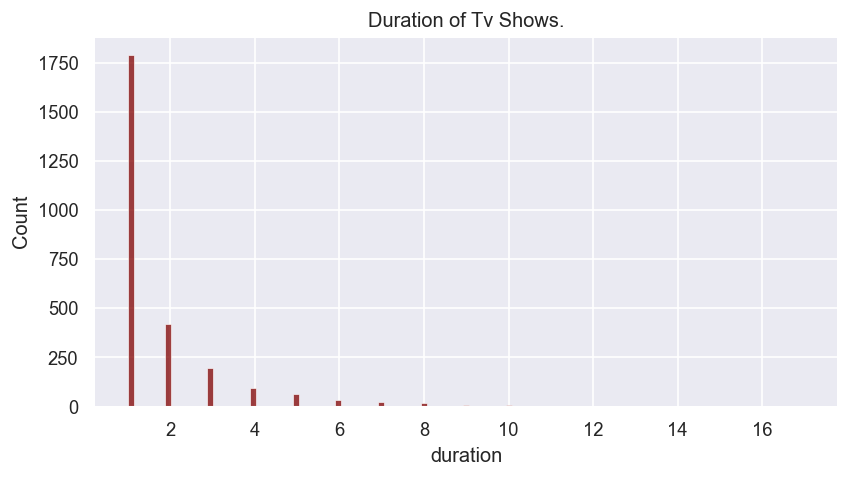

In [447]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='maroon')
plt.title('Duration of Tv Shows.')
plt.show()

*Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.*

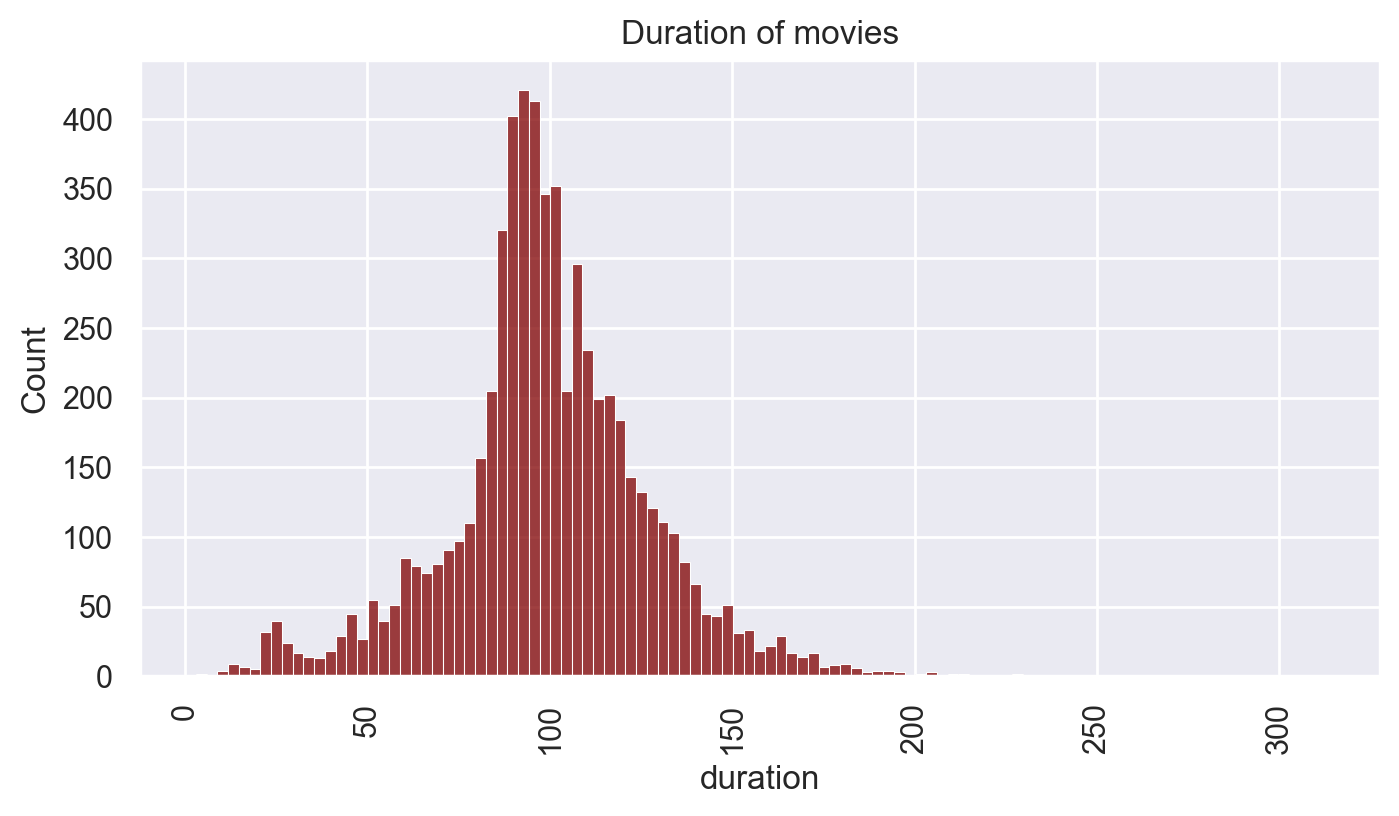

In [449]:

plt.figure(figsize=(8,4), dpi=200)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='maroon')
plt.title('Duration of movies')
plt.xticks(rotation=90)
plt.show()

*Most of the movies last for 90 to 120 minutes.*

#### Word Cloud for Titles

In [45]:
#!pip install wordcloud

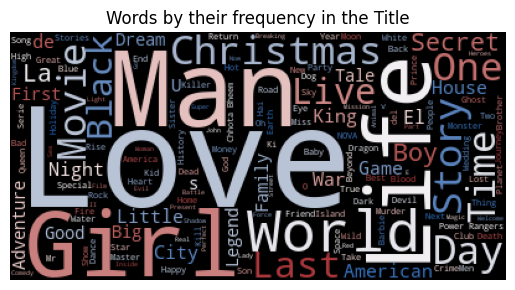

In [220]:
from wordcloud import WordCloud

# Creating a word cloud
wordcloud = WordCloud(colormap='vlag').generate(' '.join(df['title']))
# wordcloud = WordCloud().generate(df.title)
plt.imshow(wordcloud)
plt.title('Words by their frequency in the Title')
plt.axis('off')
plt.show()

This is the word cloud of titles of Netflix content.It is interesting to note that many films and series share the same keywords in their titles. “**World**, **Love**, **Life**,**Girl**, **Story**, **Christmas**, **Man**, **Black**, **Time**” are the most frequent words appearing on Netflix titles.

**Conclusion**
- Majority of the content available on Netflix is Movies.
- In recent years, emphasis have shifted towards Tv-Shows.
- Most of the contents are released during holiday season i.e., either in the year ending or the beginning.
- United States and India are among the top 5 countries that produce all of the available content on the platform.
- TV-MA tops the charts, indicating that mature content is more popular on Netflix.
- There are some common keywords in the titles of the contents
- Most of the TV shows are 1 season and movies are 90-120 mins long
- International Movies and International TV shows top the list of categories

**Recommendations**

- Allocating equal attention to TV shows can result in increased subscriptions
- The analysis reveals that content releases are notably higher during the holiday season
- Promoting additional children's content can ensure a more consistent customer age group
- Implementing marketing strategies in numerous countries worldwide and encouraging them to expand their content offerings will boost global subscriptions
- 
In addition to considering all these factors, it is crucial to prioritize consumer emotions and make well-informed decision.